In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df=pd.read_csv('Documents/dataset/iris.csv')

In [24]:
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [25]:
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
df.shape

(150, 5)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [28]:
df.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [29]:
df.isnull().sum()

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64

In [30]:
data=df.drop_duplicates('class')
data

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica


In [32]:
df.value_counts('class')

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

<AxesSubplot:xlabel='sepallength', ylabel='sepalwidth'>

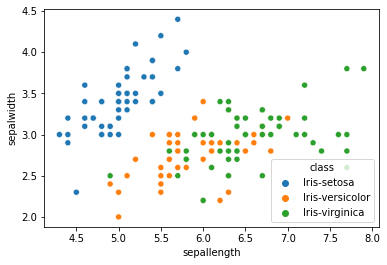

In [34]:
sns.scatterplot(x='sepallength',y='sepalwidth',hue='class',data=df)

<AxesSubplot:xlabel='petallength', ylabel='petalwidth'>

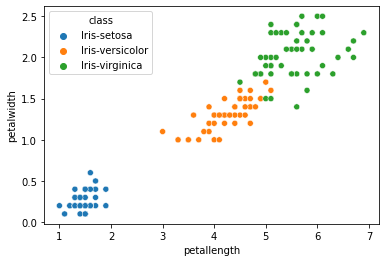

In [38]:
sns.scatterplot(x='petallength',y='petalwidth',hue='class',data=df)

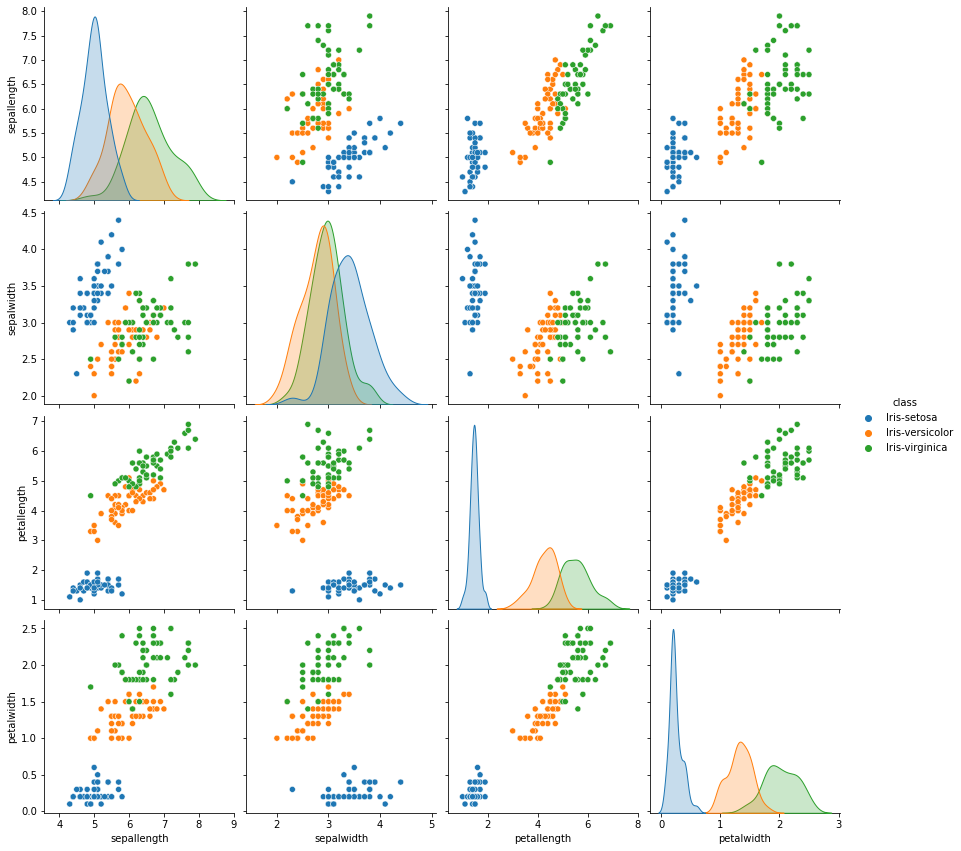

In [40]:
sns.pairplot(hue='class',height=3,data=df)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='petallength', ylabel='Density'>

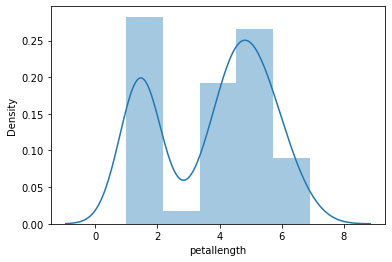

In [41]:
sns.distplot(df['petallength'])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='petallength', ylabel='Density'>

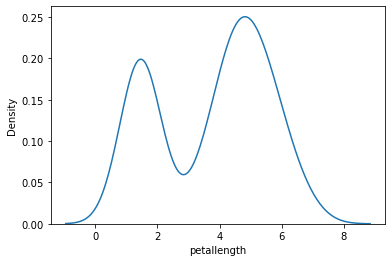

In [42]:
sns.distplot(df['petallength'],hist=False)

In [48]:
corr=df.corr()
corr

,sepallength,sepalwidth,petallength,petalwidth
sepallength,1.000000,-0.109369,0.871754,0.817954
sepalwidth,-0.109369,1.000000,-0.420516,-0.356544
petallength,0.871754,-0.420516,1.000000,0.962757
petalwidth,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

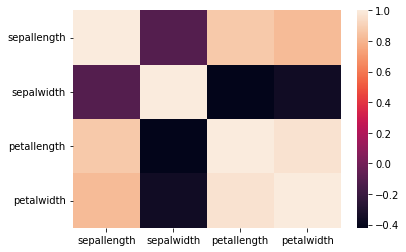

In [49]:
sns.heatmap(corr)

<AxesSubplot:xlabel='class', ylabel='sepallength'>

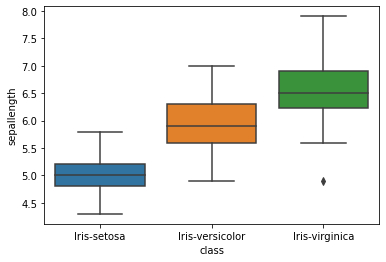

In [54]:
sns.boxplot(x='class',y='sepallength',data=df)


<AxesSubplot:xlabel='class', ylabel='sepalwidth'>

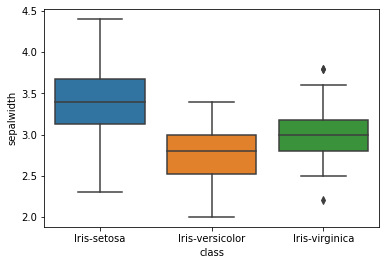

In [55]:
sns.boxplot(x='class',y='sepalwidth',data=df)


<AxesSubplot:xlabel='class', ylabel='petallength'>

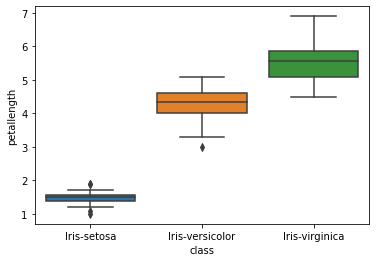

In [56]:
sns.boxplot(x='class',y='petallength',data=df)


<AxesSubplot:xlabel='class', ylabel='petalwidth'>

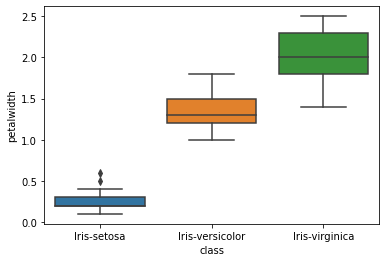

In [57]:
sns.boxplot(x='class',y='petalwidth',data=df)

<AxesSubplot:xlabel='sepalwidth'>

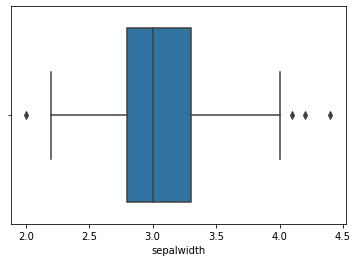

In [59]:
sns.boxplot(x='sepalwidth',data=df)

In [71]:
df=pd.read_csv('Documents/dataset/iris.csv')
df.shape

(150, 5)

<AxesSubplot:xlabel='sepalwidth'>

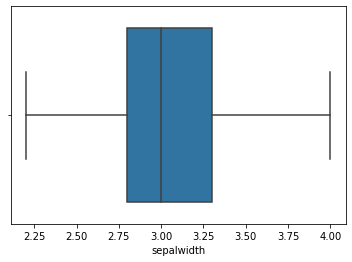

In [72]:
#Removing outliers
Q1=np.percentile(df['sepalwidth'],25,interpolation='midpoint')
Q3=np.percentile(df['sepalwidth'],75,interpolation='midpoint')
IQR=Q3-Q1
upper=np.where(df['sepalwidth']>=(Q3+1.5*IQR))
lower=np.where(df['sepalwidth']<=(Q1-1.5*IQR))
df.drop(upper[0],inplace=True)
df.drop(lower[0],inplace=True)
sns.boxplot(x='sepalwidth',data=df)

In [73]:
df.shape

(146, 5)